In [2]:
from itertools import chain
import jax.numpy as jnp
from jax import jit, vmap, grad
from jax import random

from membrane_simulation import obtain_qoi_plane, plot_membrane_shape, simulate_ringed_membrane, plot_ode_sol, W_grads, shoot_x
from membrane_simulation import _MU_elastic, _MU_stiff, _JM_elastic, _JM_stiff

In [1]:
import pickle
import numpy as np

N_to_lbf = 0.224809
lbf_to_N = 1/N_to_lbf
PSI_to_Pa = 6894.76
Pa_to_PSI = 1/PSI_to_Pa

In [5]:
thickness = 1e-3 #m
radii = (0.0254, 0.07) #m

FF1, PP1, heights11, best_x1 = obtain_qoi_plane(
        thickness,
        radii,
        ('elast',),
        F_min=0,
        F_max=30,
        p_min=40,
        p_max=8_000,
        dx_init=0.012,
        init_guess=5.9,
        max_iter=460,
        num_ps=50,
        num_Fs=3,
        atol=4e-3,
        return_best_x=True
    )



100%|██████████| 460/460 [02:01<00:00,  3.78it/s]

Loop finished after 460 iterations, but tolerance has not been reached yet for some points.


Overall, 65 pressure/force pairs were successfull.
Could not find roots for the remaining 85.

Computing heights for successfull pressure/force pairs...
Found 57 heights larger than 1mm. Other 8 were less than that.


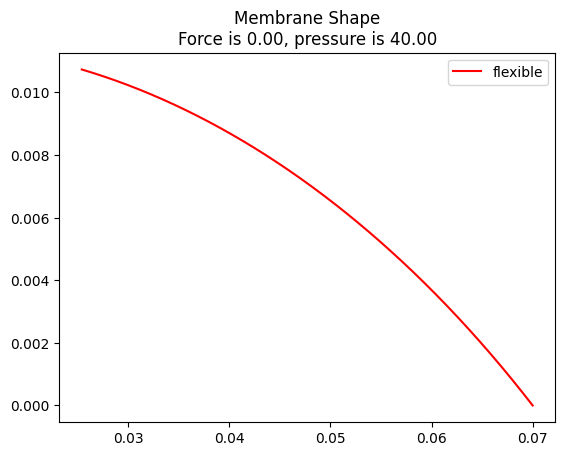

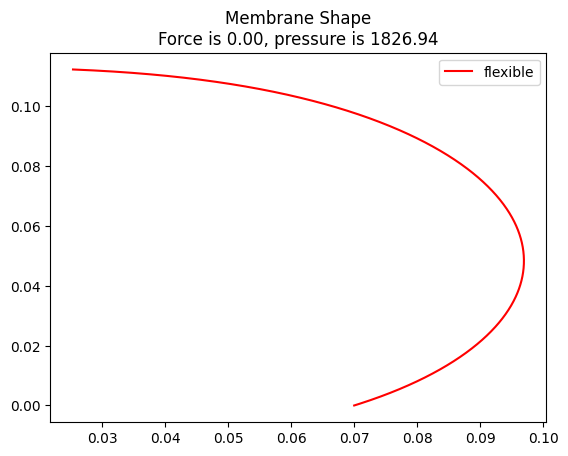

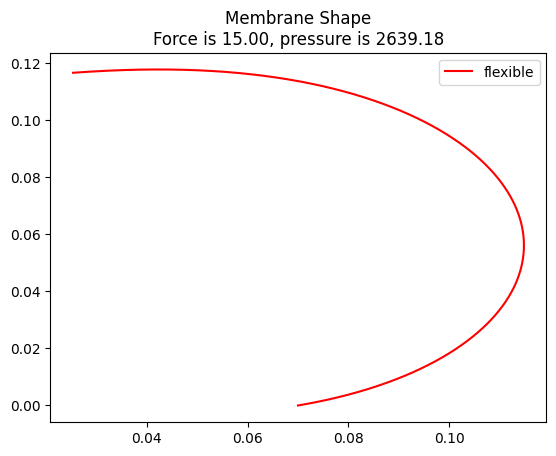

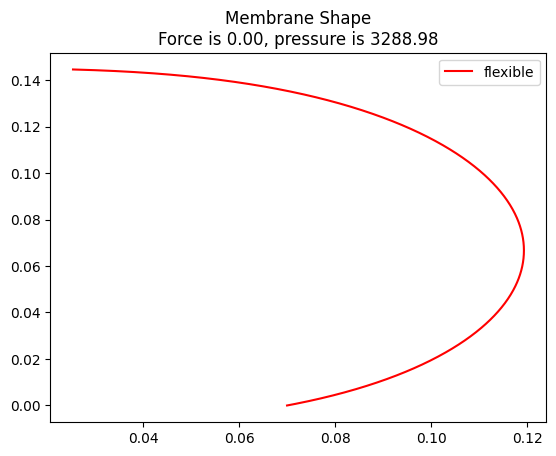

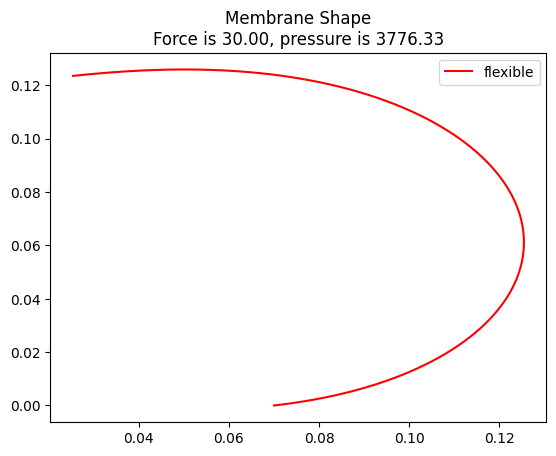

In [10]:
ss = 11

for ind in range(int(np.floor(len(FF1)/ss))):

    ind = ind*ss

    x, F, p = best_x1[ind], FF1[ind], PP1[ind]
    # print(f"Best x: {x}, F: {F}, p: {p}")

    plot_membrane_shape(x, F, p, thickness, radii, ('elast',))

In [3]:
thickness = 1e-3 #m
radii = (1e-3, 3.75e-3) #m

FF2, PP2, heights2, best_x2 = obtain_qoi_plane(
        thickness,
        radii,
        ('elast',),
        F_min=0,
        F_max=0,
        p_min=40,
        p_max=8_000,
        dx_init=0.012,
        init_guess=5.9,
        max_iter=460,
        num_ps=50,
        num_Fs=1,
        atol=4e-3,
        return_best_x=True
    )


100%|██████████| 460/460 [00:42<00:00, 10.90it/s]


Loop finished after 460 iterations, but tolerance has not been reached yet for some points.
Overall, 49 pressure/force pairs were successfull.
Could not find roots for the remaining 1.

Computing heights for successfull pressure/force pairs...
Found 31 heights larger than 1mm. Other 18 were less than that.


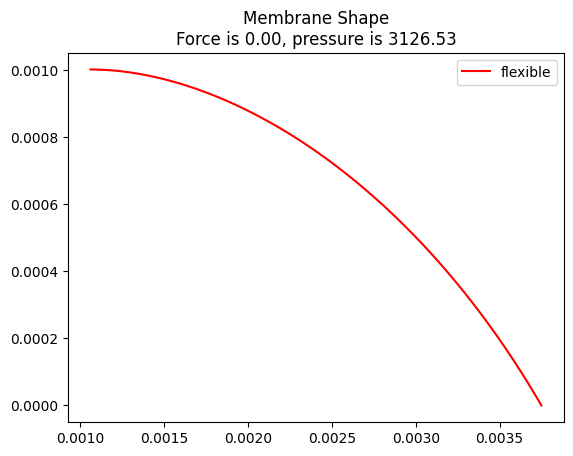

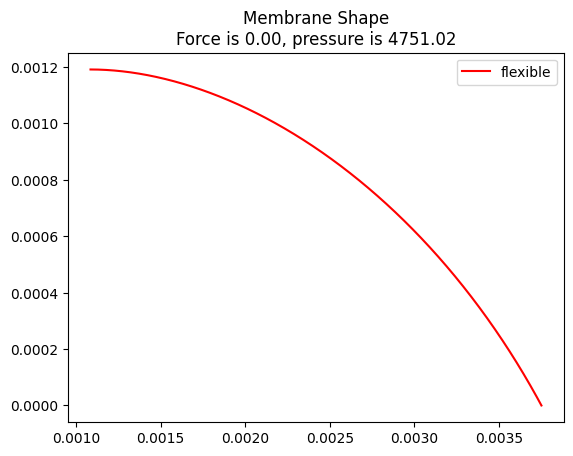

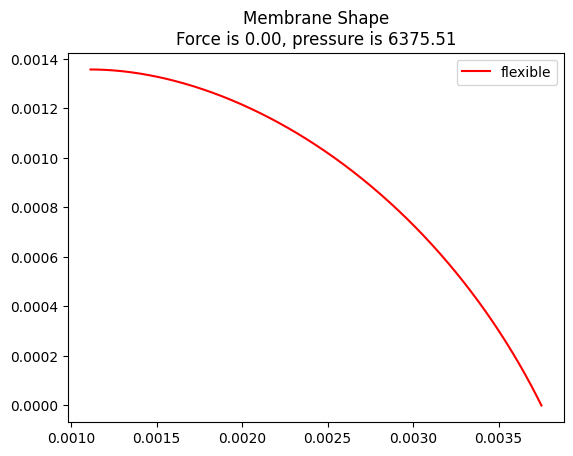

In [4]:
ss = 10

for ind in range(int(np.floor(len(FF2)/ss))):

    ind = ind*ss

    x, F, p = best_x2[ind], FF2[ind], PP2[ind]
    # print(f"Best x: {x}, F: {F}, p: {p}")

    plot_membrane_shape(x, F, p, thickness, radii, ('elast',))

In [5]:
thickness = 1e-3 #m
radii = (1e-4, 3.75e-3) #m

FF3, PP3, heights3, best_x3 = obtain_qoi_plane(
        thickness,
        radii,
        ('elast',),
        F_min=0,
        F_max=0,
        p_min=40,
        p_max=40_000,
        dx_init=0.012,
        init_guess=7,
        max_iter=460,
        num_ps=50,
        num_Fs=1,
        atol=4e-3,
        return_best_x=True
    )


100%|██████████| 460/460 [00:34<00:00, 13.29it/s]


Loop finished after 460 iterations, but tolerance has not been reached yet for some points.
Overall, 0 pressure/force pairs were successfull.
Could not find roots for the remaining 50.

Computing heights for successfull pressure/force pairs...
Found 0 heights larger than 1mm. Other 0 were less than that.


In [6]:
ss = 4

for ind in range(int(np.floor(len(FF3)/ss))):

    ind = ind*ss

    x, F, p = best_x3[ind], FF3[ind], PP3[ind]
    # print(f"Best x: {x}, F: {F}, p: {p}")

    plot_membrane_shape(x, F, p, thickness, radii, ('elast',))